(50, 1)
(50, 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
设定阈值的贝叶斯分类的正确率为:96.67%
连续值求概率的贝叶斯分类的正确率为:96.00%


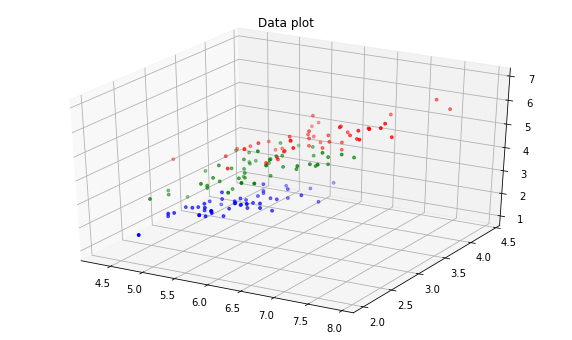

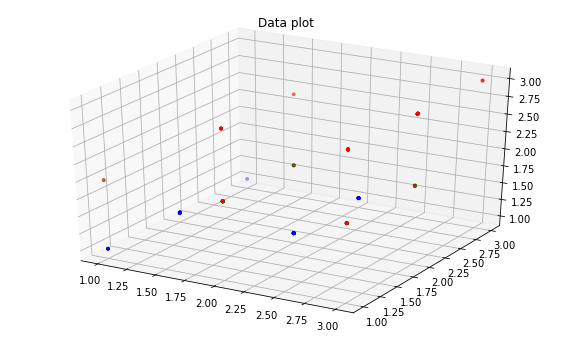

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
#数据预处理
datafile = 'data/iris.txt'
data = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2,3),unpack=True)
old_data = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2,3),unpack=True)
x = np.transpose(data)
#print(x)
old_x = np.transpose(old_data)
datay = np.loadtxt(datafile,delimiter=',',usecols=(4),unpack=True,dtype='str')
y = np.array(np.transpose(datay)).reshape(x.shape[0],1)
#print(y.shape)

#将字符型类别转换成数字
def transfer_classes(x):
    mask0 = x=='Iris-setosa'
    mask1 = x=='Iris-versicolor'
    mask2 = x=='Iris-virginica'
    x[mask0]='0'
    x[mask1]='1'
    x[mask2]='2'
    x=x.astype(np.float)
    return x
y = transfer_classes(y)

#print(x_and_y)
#print(x_and_y.shape)
x_and_y = np.hstack((x,y))
#对特征数据进行设定阈值,便于进行求概率操作
#鸢尾花有四个特征：花萼长度，花萼宽度，花瓣长度，花瓣宽度
#print(str(np.mean(x[:,0]))+'\n'+str(np.max(x[:,0]))+'\n'+str(np.min(x[:,0])))
#print(str(np.mean(x[:,1]))+'\n'+str(np.max(x[:,1]))+'\n'+str(np.min(x[:,1])))
#print(str(np.mean(x[:,2]))+'\n'+str(np.max(x[:,2]))+'\n'+str(np.min(x[:,2])))
#print(str(np.mean(x[:,3]))+'\n'+str(np.max(x[:,3]))+'\n'+str(np.min(x[:,3])))
#初步分析数据的最大值，最小值，以及平均值来设定阈值，将阈值设定为三个级别
#三个级别为大，中，小
def change_x(x):
    #首先设置花萼长度
    #小设置为 1
    mask0 = x[:,0]<5
    #中设置为 2
    mask1 =(x[:,0]>=5 )&(x[:,0]<=6)
    #大设置为 3
    mask2 = x[:,0]>6
    x[mask0,0]=1
    x[mask1,0]=2
    x[mask2,0]=3
    
    #同理设置花萼宽度
    #小设置为 1
    mask0 = x[:,1]<3
    #中设置为 2
    mask1 =(x[:,1]>=3 )&(x[:,1]<=3.5)
    #大设置为 3
    mask2 = x[:,1]>3.5
    x[mask0,1]=1
    x[mask1,1]=2
    x[mask2,1]=3
    
    #设置花瓣长度
    #小设置为 1
    mask0 = x[:,2]<3
    #中设置为 2
    mask1 = (x[:,2]>=3 )&(x[:,2]<=5)
    #大设置为 3
    mask2 = x[:,2]>5
    x[mask0,2]=1
    x[mask1,2]=2
    x[mask2,2]=3
    
    #设置花瓣宽度
    #小设置为 1
    mask0 = x[:,3]<0.8
    #中设置为 2
    mask1 = (x[:,3]>=0.8)&(x[:,3]<=1.6)
    #大设置为 3
    mask2 = x[:,3]>1.6
    x[mask0,3]=1
    x[mask1,3]=2
    x[mask2,3]=3
    return x
#将离散型数据展示为数值型数据
new_x = change_x(x)
#print(x.shape)
x_and_y_change = np.hstack((x,y))
#展示数据
def plot_data(x,y):
    plt.figure(figsize=(10,6))
    mask0 = x[:,x.shape[1]-1] ==0
    mask1 = x[:,x.shape[1]-1] ==1
    mask2 = x[:,x.shape[1]-1] ==2
    y0 = y[mask0]
    y1 = y[mask1]
    y2 = y[mask2]
    print(y1.shape)
    #print(x.shape[1])
    ax = plt.axes(projection='3d')
    #print(x[mask0,1].shape)
    ax.scatter3D(x[mask0,0],x[mask0,1],x[mask0,2],c='b',s=8)
    ax.scatter3D(x[mask1,0],x[mask1,1],x[mask1,2],c='g',s=8)
    ax.scatter3D(x[mask2,0],x[mask2,1],x[mask2,2],c='r',s=8)
    plt.title('Data plot')
    return 0
plot_data(x_and_y,y)
plot_data(x_and_y_change,y)
#构建类别集合,分别代表三种鸢尾花
P_classes = np.zeros((1,y.shape[1]))#1x3矩阵，分别代表p(y=0) P(y=1) p(y=2)
#print(P_classes.shape)
#计算出p(y),为先验概率，利用训练集中的数据统计不同类别的概率 ,在这里使用拉普拉斯平滑
def get_prob_y(y):
    p=[]
    mask0 = y[:,y.shape[1]-1] ==0
    mask1 = y[:,y.shape[1]-1] ==1
    mask2 = y[:,y.shape[1]-1] ==2
    p.append((y[mask0].size+1)/(y.size+3))
    p.append((y[mask1].size+1)/(y.size+3))
    p.append((y[mask2].size+1)/(y.size+3))
    return p
P_classes = get_prob_y(y)#得到p(y)
#print(x)
#获取条件概率函，针对每一个x而言，维数为4

def get_prob_x_in_y(xi,x):#使用离散概率计算,包含拉普拉斯平滑
    #每一个x都包含四个分量，都包含三个待分类别
    #由贝叶斯公式可得
    mask1 = x[0:50,0]==xi[0]
    mask2 = x[0:50,1]==xi[1]
    mask3 = x[0:50,2]==xi[2]
    mask4 = x[0:50,3]==xi[3]
    p_y0 = P_classes[0]*(x[0:50][mask1].shape[0]+1)/(50+3)*(x[0:50][mask2].shape[0]+1)/(50+3)*(x[0:50][mask3].shape[0]+1)/(50+3)*(x[0:50][mask4].shape[0]+1)/(50+3)
    mask1 = x[50:100,0]==xi[0]
    mask2 = x[50:100,1]==xi[1]
    mask3 = x[50:100,2]==xi[2]
    mask4 = x[50:100,3]==xi[3]
    p_y1 = P_classes[1]*(x[50:100][mask1].shape[0]+1)/(50+3)*(x[50:100][mask2].shape[0]+1)/(50+3)*(x[50:100][mask3].shape[0]+1)/(50+3)*(x[50:100][mask4].shape[0]+1)/(50+3)
    mask1 = x[100:150,0]==xi[0]
    mask2 = x[100:150,1]==xi[1]
    mask3 = x[100:150,2]==xi[2]
    mask4 = x[100:150,3]==xi[3]
    p_y2 = P_classes[2]*(x[50:100][mask1].shape[0]+1)/(50+3)*(x[50:100][mask2].shape[0]+1)/(50+3)*(x[50:100][mask3].shape[0]+1)/(50+3)*(x[50:100][mask4].shape[0]+1)/(50+3)
    if((p_y0>=p_y1)&(p_y0>=p_y2)):
        return 0
    else:
        if(p_y1>=p_y2):
            return 1
        else:
            return 2#返回贝叶斯公式求得概率最大的类别
        
#使用高斯分布的概率密度来处理连续值概率
#首先求三个类别分别在四个特征属性上取值的均值和方差
def get_paramters(x):
    paramters = np.zeros((3,4,2))
    for i in range(3):
        for j in range(4):
            if i==0:
                paramters[i][j]=[np.mean(x[0:50,j]),np.var(x[0:50,j])]
            elif i==1:
                paramters[i][j]=[np.mean(x[50:100,j]),np.var(x[50:100,j])]
            elif i ==2:
                paramters[i][j]=[np.mean(x[100:150,j]),np.var(x[100:150,j])]
    return paramters 
#print(old_x)
parameter = get_paramters(old_x)

def get_P(values,mean,var):
    return (1/np.sqrt(2*np.pi*var)*np.exp(-(values-mean)**2/(2*var)))
    
    
#根据均值和方差来进行计算连续值的概率
def get_probxy_in_G(xi,x):
    p_y0 = P_classes[0]*get_P(xi[0],parameter[0][0][0],parameter[0][0][1])*get_P(xi[1],parameter[0][1][0],parameter[0][1][1])*get_P(xi[2],parameter[0][2][0],parameter[0][2][1])*get_P(xi[3],parameter[0][3][0],parameter[0][3][1])
    p_y1 = P_classes[1]*get_P(xi[0],parameter[1][0][0],parameter[1][0][1])*get_P(xi[1],parameter[1][1][0],parameter[1][1][1])*get_P(xi[2],parameter[1][2][0],parameter[1][2][1])*get_P(xi[3],parameter[1][3][0],parameter[1][3][1])
    p_y2 = P_classes[2]*get_P(xi[0],parameter[2][0][0],parameter[2][0][1])*get_P(xi[1],parameter[2][1][0],parameter[2][1][1])*get_P(xi[2],parameter[2][2][0],parameter[2][2][1])*get_P(xi[3],parameter[2][3][0],parameter[2][3][1])
    if((p_y0>=p_y1)&(p_y0>=p_y2)):
        return 0
    else:
        if(p_y1>=p_y2):
            return 1
        else:
            return 2#返回贝叶斯公式求得概率最大的类别

        
def bayes(x):
    classes=[]
    for i in range(x.shape[0]):#对于每一个x都进行处理分类
        classes.append(get_prob_x_in_y(x[i],x))
    return classes
def continue_bayes(x):
    classes=[]
    for i in range(x.shape[0]):
        classes.append(get_probxy_in_G(x[i],x))
    return classes
#计算分类正确率
def corret(y,pre_y):
    num = 0
    for i in range(len(pre_y)):
        if(y[i]==pre_y[i]):
            num=num+1
    return float(num/len(pre_y))
#print(x)
predict = bayes(new_x)
print(predict)
pre_contiune = continue_bayes(old_x)

rate = corret(y,predict)
rate_continue = corret(y,pre_contiune)
print(pre_contiune)
print("设定阈值的贝叶斯分类的正确率为:{:.2f}%".format(rate*100))
print("连续值求概率的贝叶斯分类的正确率为:{:.2f}%".format(rate_continue*100))
#print(P_classes)
#print(y)


array([[2., 2., 1., 1.],
       [1., 2., 1., 1.],
       [1., 2., 1., 1.],
       [1., 2., 1., 1.],
       [2., 3., 1., 1.],
       [2., 3., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 1.],
       [1., 1., 1., 1.],
       [1., 2., 1., 1.],
       [2., 3., 1., 1.],
       [1., 2., 1., 1.],
       [1., 2., 1., 1.],
       [1., 2., 1., 1.],
       [2., 3., 1., 1.],
       [2., 3., 1., 1.],
       [2., 3., 1., 1.],
       [2., 2., 1., 1.],
       [2., 3., 1., 1.],
       [2., 3., 1., 1.],
       [2., 2., 1., 1.],
       [2., 3., 1., 1.],
       [1., 3., 1., 1.],
       [2., 2., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 1.],
       [2., 2., 1., 1.],
       [2., 2., 1., 1.],
       [2., 2., 1., 1.],
       [1., 2., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 1.],
       [2., 3., 1., 1.],
       [2., 3., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 1.],
       [2., 2., 1., 1.],
       [1., 2., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 1.],
